In [77]:
# imports
import matplotlib.pylab as plt
from fnmatch import fnmatch
import os
import cv2
import json
import random
import numpy as np

## How to gennerate the Random Background images:

### Start with loading the all the backgrounds images: 

In [78]:
# load background images:

# the root of folder containing all the random backgrounds
root="../data/backgrounds/"
list_backgrounds=[]
pattern = "*.jpg"
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            list_backgrounds.append(os.path.join(path, name))
            
# list all the filepaths to the images         
print(list_backgrounds)


['../data/backgrounds/museum/museo_03_13_flickr.jpg', '../data/backgrounds/museum/museo_05_24_flickr.jpg', '../data/backgrounds/museum/museo_03_24_flickr.jpg', '../data/backgrounds/museum/museo_03_14_flickr.jpg', '../data/backgrounds/museum/museo_07_01_flickr.jpg', '../data/backgrounds/airport_inside/airport_inside_0009.jpg', '../data/backgrounds/airport_inside/airport_inside_0008.jpg', '../data/backgrounds/airport_inside/airport_inside_0006.jpg', '../data/backgrounds/airport_inside/airport_inside_0007.jpg', '../data/backgrounds/airport_inside/airport_inside_0010.jpg', '../data/backgrounds/airport_inside/airport_inside_0012.jpg', '../data/backgrounds/airport_inside/airport_inside_0011.jpg', '../data/backgrounds/classroom/214classroom.jpg', '../data/backgrounds/classroom/30_AvH_112_classroom.jpg', '../data/backgrounds/classroom/90468092_47c4b7f04d.jpg', '../data/backgrounds/classroom/244class.jpg', '../data/backgrounds/classroom/400px_Walton_High_School_New_Classroom.jpg', '../data/back

### Randomly select a background

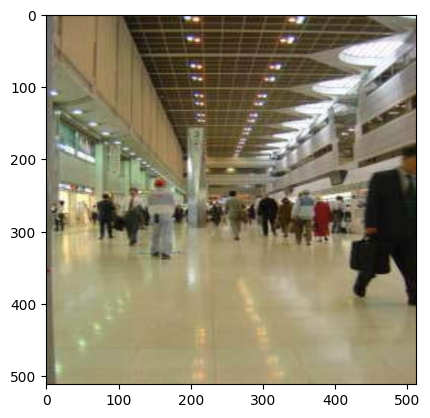

In [79]:
index_background=random.randrange(len(list_backgrounds))
background=plt.imread(list_backgrounds[index_background])
background=cv2.resize(background, [512, 512])
plt.imshow(background)
plt.show()

### Load an green background image:

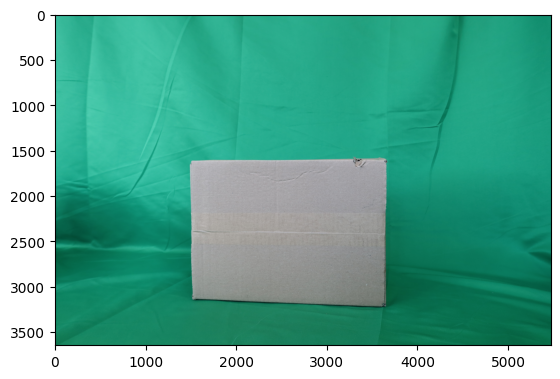

In [80]:
# load a image: 

name="0589"  # image name
img= plt.imread("../data/green_boxes/IMG_"+name+".JPG")
plt.imshow(img)

plt.show()

### Find the image annotation in the annotation file:


In [81]:
# load the json files:
with open("../data/green_boxes/train.json", 'r') as f:
    train= json.load(f)
    
with open("../data/green_boxes/val.json", 'r') as f:
    val= json.load(f)
    
data=train+val
print(len(data))

443


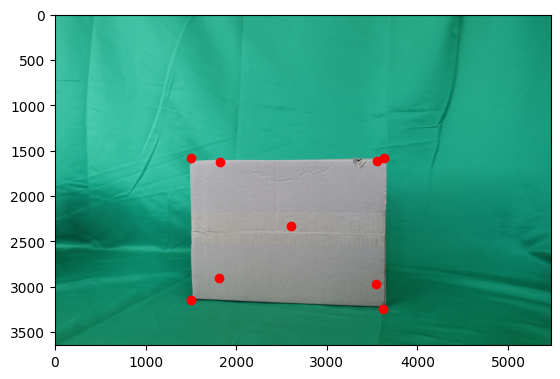

In [82]:
# find the image annotation in the annotationfile: 
points=[]
for dict in data:
    if name in dict["image_name"]:
        points=dict["points"]
        break
if points==[]:
    print("no annotation found for this image")
    
    
else:
    h, w, c=img.shape 
    plt.imshow(img)
    for p in points:
        plt.plot(p[0],h-p[1], 'ro')  # green background points are stored inverted
    plt.show()


### choose random scale for the box (between 100 and 200)


In [83]:
scale=random.randrange(100, 200)
# resize the green_background img to this size:
img_size=img.shape
print(img_size)
img=cv2.resize(img, [scale, scale])
# rescale the annotations so they fit on the scaled box: 
x_max = img_size[1]
y_max= img_size[0]
new_points=[]
for p in points:
    p_x=int((p[0]/x_max)*scale)
    p_y=int((p[1]/y_max)*(scale))
    new_points.append([p_x, scale-p_y])
points=np.array(new_points)


(3648, 5472, 3)


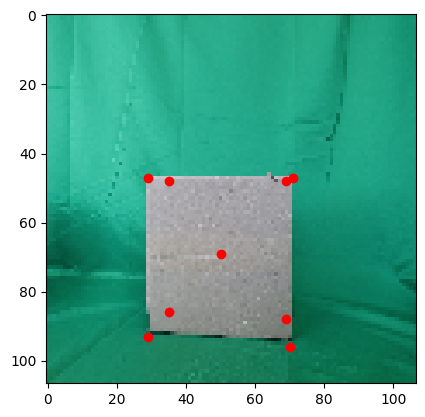

In [84]:
# check if the annotations still fit: 
plt.imshow(img)
for p in points:
    plt.plot(p[0],p[1], 'ro')  # green background points are stored inverted
plt.show()

### remove the green background

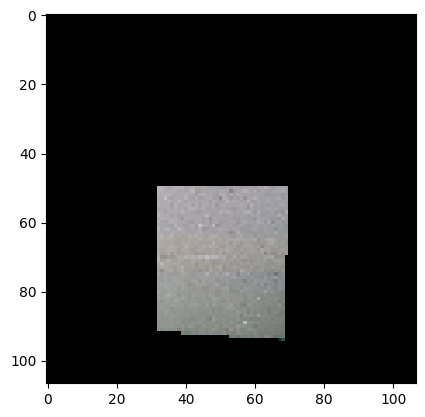

In [85]:
cimg = np.zeros_like(img)
# find the outside points
hull = cv2.convexHull(np.array(points))
# create binary image
cv2.drawContours(cimg, [hull], -1, (255,255,255), -1)
cimg=cimg[:,:,0]

# Creating kernel
kernel = np.ones((6,6), np.uint8)
# erode the binary image so the green border around the box is removed
erode = cv2.erode(cimg, kernel)

result=cv2.bitwise_and(img, img, mask=erode)
plt.imshow(result)


### cut a random part out of the background and replace with the box

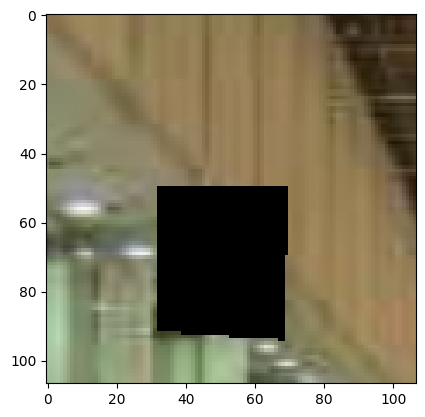

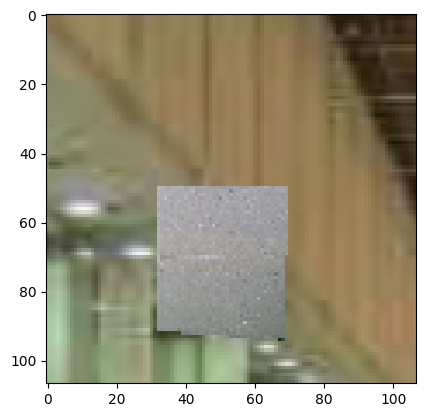

In [86]:
h, w, c=background.shape
h1 = random.randrange(0, h - scale)
w1 = random.randrange(0, w - scale)
cutout=background[h1:h1+scale,w1:w1+scale,:]
# invert the mask (1 is background, 0 is box)
masked = cv2.bitwise_and(cutout,cutout, mask=255-erode)
plt.imshow(masked)
plt.show()
# fill the blank with the box:
cutout= masked+result
plt.imshow(cutout)
plt.show()

#


### Place the cutout back in the background

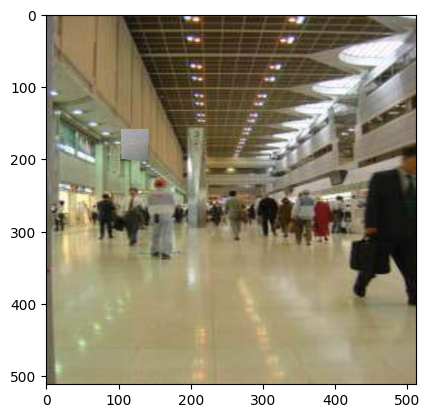

In [87]:
background[h1:h1+scale,w1:w1+scale,:]=cutout
plt.imshow(background)

### shift the annotations so they are correct in the whole image:


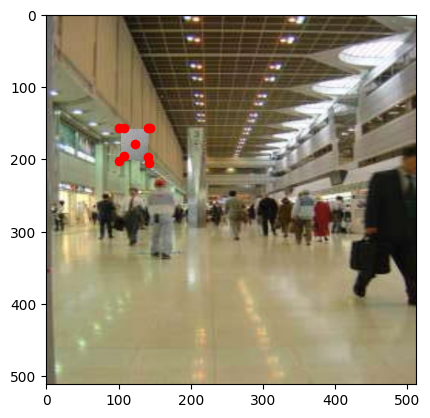

In [88]:
new_points=[]
for p in points:
    new_points.append([p[0]+w1, p[1]+h1])
np.array(new_points)

plt.imshow(background)
for p in new_points:
    plt.plot(p[0], p[1], "ro")
plt.show()

Done!